In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [4]:
X = df.values[:, 0:10]
X

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]], dtype=int64)

In [5]:
Y = df.values[:, 10]
Y

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [8]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Using TensorFlow backend.


In [9]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [10]:
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=100,
                validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 230us/step - loss: 0.6919 - accuracy: 0.5450 - val_loss: 0.6875 - val_accuracy: 0.6575
Epoch 2/100
1022/1022 [==============================] - 0s 38us/step - loss: 0.6833 - accuracy: 0.6918 - val_loss: 0.6791 - val_accuracy: 0.6347
Epoch 3/100
1022/1022 [==============================] - 0s 41us/step - loss: 0.6762 - accuracy: 0.6380 - val_loss: 0.6721 - val_accuracy: 0.6119
Epoch 4/100
1022/1022 [==============================] - 0s 38us/step - loss: 0.6694 - accuracy: 0.6135 - val_loss: 0.6657 - val_accuracy: 0.6119
Epoch 5/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.6629 - accuracy: 0.6429 - val_loss: 0.6595 - val_accuracy: 0.6256
Epoch 6/100
1022/1022 [==============================] - 0s 38us/step - loss: 0.6566 - accuracy: 0.6605 - val_loss: 0.6538 - val_accuracy: 0.6575
Epoch 7/100
1022/1022 [==============================] - 0s 41us/step - loss

In [11]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 27us/step


0.8767123222351074

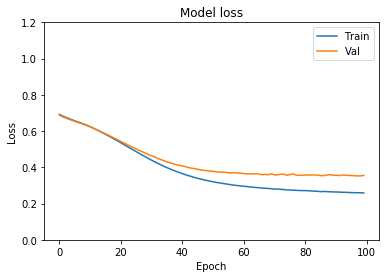

In [35]:
import matplotlib.pyplot as plt

def show_loss_plot(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.ylim(top=1.2, bottom=0)
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

show_loss_plot(hist)

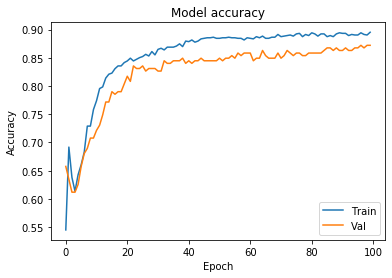

In [22]:
def show_acc_plot(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()

show_acc_plot(hist)

In [17]:
model_huge = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_huge.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

hist_huge = model_huge.fit(X_train, Y_train,
                       batch_size=32, epochs=100,
                       validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4737 - accuracy: 0.8023 - val_loss: 0.4230 - val_accuracy: 0.8402
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3679 - accuracy: 0.8659 - val_loss: 0.4288 - val_accuracy: 0.8174
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2962 - accuracy: 0.8816 - val_loss: 0.3748 - val_accuracy: 0.8447
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2606 - accuracy: 0.8836 - val_loss: 0.4049 - val_accuracy: 0.8447
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2529 - accuracy: 0.8953 - val_loss: 0.3572 - val_accuracy: 0.8584
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2530 - accuracy: 0.8885 - val_loss: 0.4228 - val_accuracy: 0.8539
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2362

In [18]:
model_huge.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 201us/step


0.853881299495697

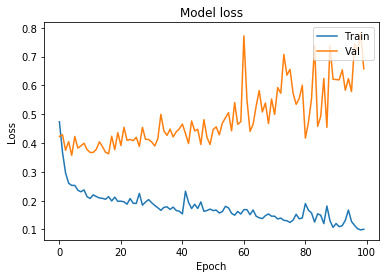

In [21]:
show_loss_plot(hist_huge)

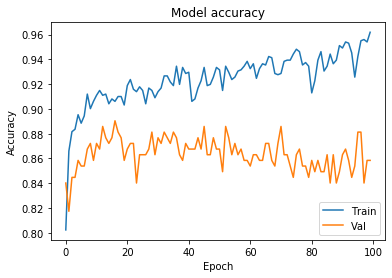

In [23]:
show_acc_plot(hist_huge)

In [27]:
from keras.layers import Dropout
from keras import regularizers

model_regular = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [28]:
model_regular.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

hist_regular = model_regular.fit(X_train, Y_train,
                                batch_size=32, epochs=100,
                                validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 14.2312 - accuracy: 0.5920 - val_loss: 3.9018 - val_accuracy: 0.8311
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.6703 - accuracy: 0.8288 - val_loss: 0.7544 - val_accuracy: 0.7945
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5551 - accuracy: 0.8738 - val_loss: 0.5396 - val_accuracy: 0.8676
Epoch 4/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.5144 - accuracy: 0.8669 - val_loss: 0.5688 - val_accuracy: 0.8311
Epoch 5/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.5005 - accuracy: 0.8708 - val_loss: 0.5271 - val_accuracy: 0.8630
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4752 - accuracy: 0.8767 - val_loss: 0.5130 - val_accuracy: 0.8676
Epoch 7/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.450

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4232 - accuracy: 0.8924 - val_loss: 0.5160 - val_accuracy: 0.8539
Epoch 58/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4161 - accuracy: 0.8904 - val_loss: 0.4800 - val_accuracy: 0.8813
Epoch 59/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4088 - accuracy: 0.8875 - val_loss: 0.4871 - val_accuracy: 0.8813
Epoch 60/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4120 - accuracy: 0.8904 - val_loss: 0.5431 - val_accuracy: 0.8356
Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4159 - accuracy: 0.8953 - val_loss: 0.4846 - val_accuracy: 0.8721
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4130 - accuracy: 0.8933 - val_loss: 0.5430 - val_accuracy: 0.8356
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4153 - accuracy: 0.8904 - val_loss: 0.4883 -

In [34]:
model_regular.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 374us/step


0.8675799369812012

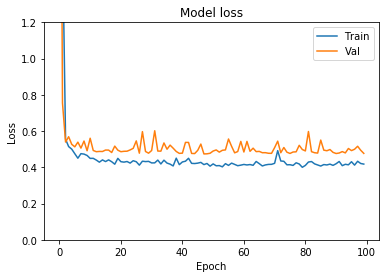

In [36]:
show_loss_plot(hist_regular)

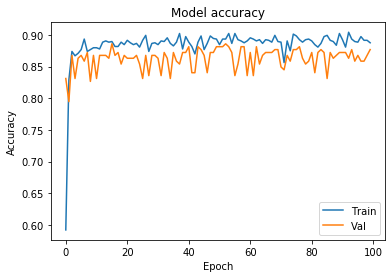

In [32]:
show_acc_plot(hist_regular)